In [18]:
words = open('names.txt', 'r').read().splitlines()

In [19]:
len(words)

32033

In [20]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [21]:
min(len(w) for w in words)

2

In [22]:
max(len(w) for w in words)

15

In [23]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [24]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [25]:
pip install torch

442.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [26]:
import torch

In [27]:
N = torch.zeros((28, 28), dtype = torch.int32)

On a mis en int32 car on sait que le min est 1 et on aura une plus grande précision

In [28]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [29]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [30]:
itos = {i:s for s, i in stoi.items()}

On inverse l'ordre pour nous arranger

In [34]:
pip install numpy

515.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


RuntimeError: Numpy is not available

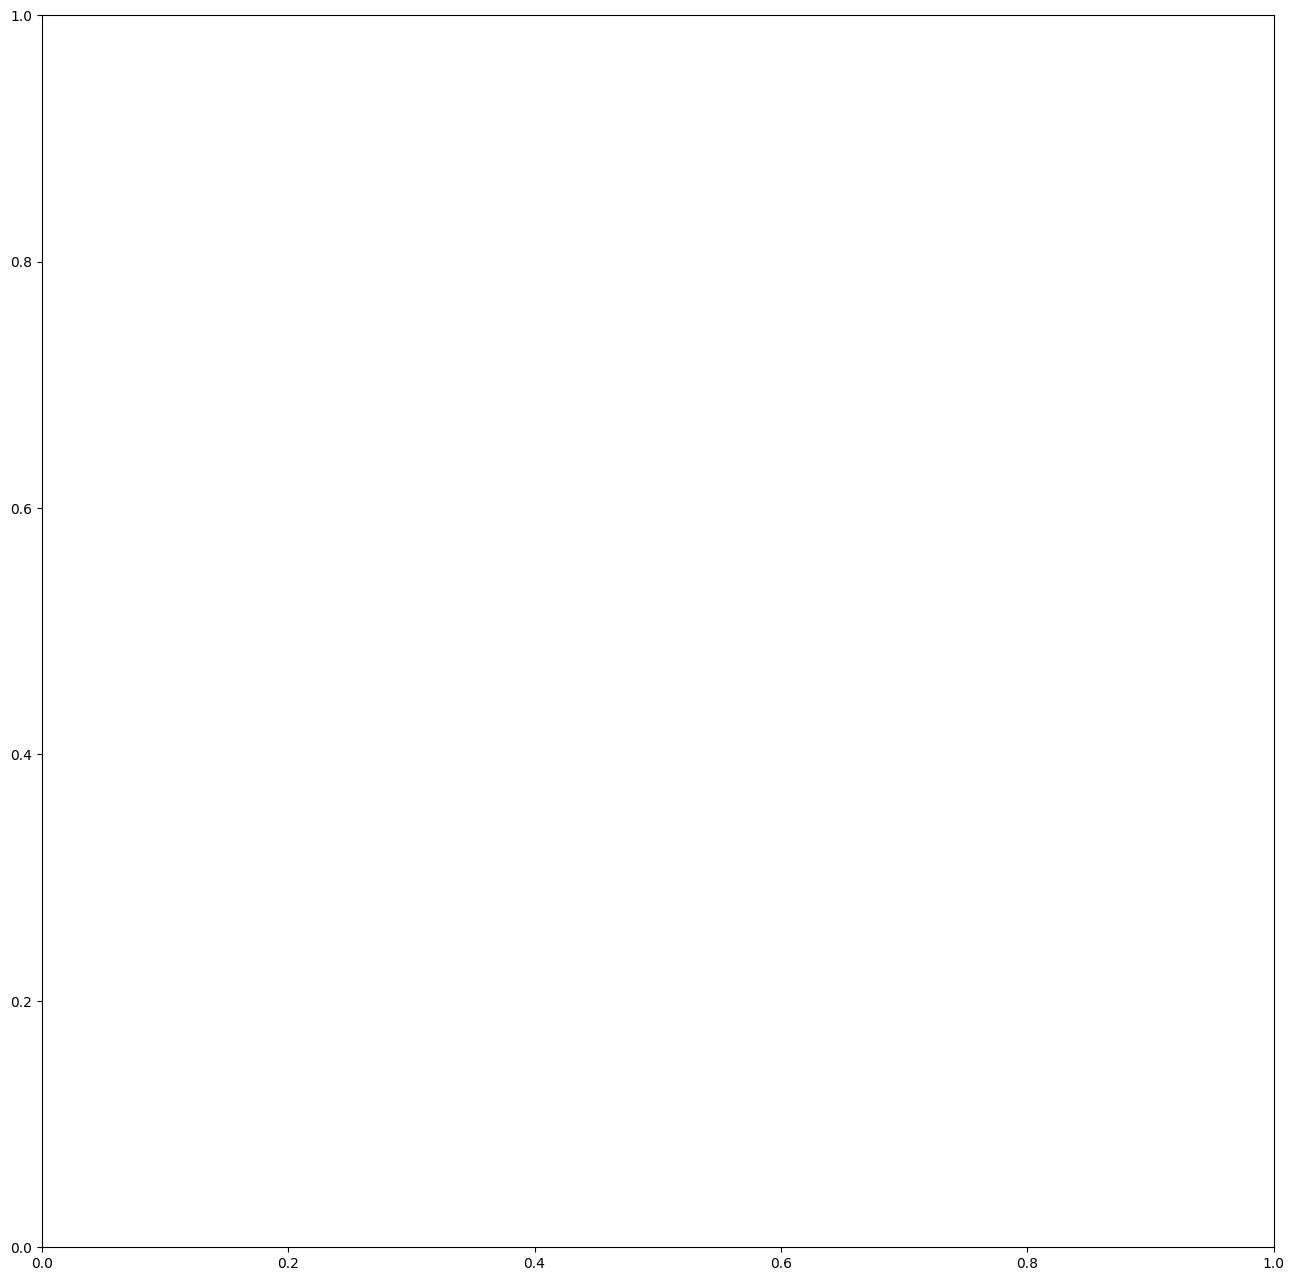

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')


On voit bien qu'une ligne est de zero et une colonne est de zéros donc on va changer le code

In [ ]:
N = torch.zeros((27, 27), dtype = torch.int32)

: 

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

: 

In [ ]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

: 

In [ ]:
N[0]

: 

_____________________________________________
On va maintenant en faire des probabilitées
_____________________________________________

In [ ]:
p = N[0].float()
p = p/p.sum()
p

: 

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

: 

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

: 

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

: 

Ecrivons la boucle !

In [ ]:
P = (N+1).float()

: 

In [ ]:
P.sum(1, keepdim=True).shape

: 

Grace au "Broadcast" on peut diviser une dim(27, 27) par une dim(27, 1)

In [ ]:
P /= P.sum(1, keepdim=True)

: 

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out = []
    ix = 0
    while True:
        #p = torch.ones(27) / 27.0 
        #Model pas entrainé du tout
        
        #p = N[ix].float()
        #p = p/p.sum()
        #Model un peu entrainé mais naze
        
        p = P[ix]
        

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

: 

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

: 

Nous avons donc la fonctionn du loss, maintenant on va entrainer le model

In [ ]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs) # input
ys = torch.tensor(ys) # celui d'apres 

: 

In [ ]:
xs

: 

In [ ]:
ys

: 

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() 
# On transforme en float car on pourra ensuite les intégrer dans un 
# neural network contrairement au int
xenc

: 

In [ ]:
plt.imshow(xenc)

: 

In [ ]:
W = torch.randn((27, 27))
#xenc @ W

: 

On a donc entré la matrice xenc dans la premiere layer du neural net
On aura qu'une seul layer
l'objectif est que les 27 colonnes donneront le log du compte

In [ ]:
#(xenc @ W).exp()
# On applique exp pour pouvoir interpreter les resultats sortant

: 

Ensuite on normalise pour avoir une probabilité sur chaque lignes
sum(1, keepdims=True) permet justement de sommer sur chaque lignes pour avoir une probabilité

In [ ]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)
probs

: 

In [ ]:
probs[0].sum()

: 

____________________________________________________________________>

SUMMARY

____________________________________________________________________>


In [ ]:
xs

: 

In [ ]:
ys

: 

In [ ]:
# random initalize 27 neurons, weight, with 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

: 

In [ ]:
# input for the network by one-hot encoding 
xenc = F.one_hot(xs, num_classes=27).float()

logits = xenc @ W # predict log count
counts = logits.exp() # count equivalent to N
probs = counts / counts.sum(1, keepdims = True)
# probabilité pour le charactère suivant

#counts & probs --> 'softmax' (normalisation function)

: 

In [ ]:
probs.shape

: 

In [ ]:
nlls = torch.zeros(5)

for i in range(5):
    # ième bigram
    x = xs[i].item() #input character index
    y = ys[i].item() #label character index
    p = probs[i, y]
    logp = torch.log(p)
    nll = -logp
    nlls[i] = nll

print('average negative log likelihodd, loss =', nlls.mean().item())
    

: 

Objectif : modifier le W pour avoir un meilleur loss

________________________________________________________________>

OPTIMISATION
grace au micrograd qu'on a fait ou presque
________________________________________________________________>

In [ ]:
xs

: 

In [ ]:
ys

: 

In [ ]:
# random initalize 27 neurons, weight, with 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad = True)

: 

In [ ]:
# Foward pass

# input for the network by one-hot encoding 
xenc = F.one_hot(xs, num_classes=27).float()

logits = xenc @ W # predict log count
counts = logits.exp() # count equivalent to N
probs = counts / counts.sum(1, keepdims = True)
# probabilité pour le charactère suivant

loss = -probs[torch.arange(5), ys].log().mean()

: 

In [ ]:
loss.item()

: 

In [ ]:
# Backward pass

W.grad = None # Initalize to zero the gradient
loss.backward()

: 

In [ ]:
# Update

W.data += (-0.1 * W.grad)

: 

Mega big optimisation !!

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# Initalise the Network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad = True)

: 

In [ ]:
# Gradient descent
for k in range(10):
    
    # Foward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W  
    counts = logits.exp()  
    probs = counts / counts.sum(1, keepdims = True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    # Backward pass
    W.grad = None 
    loss.backward()

    # Update
    W.data += (-50 * W.grad)

: 

In [ ]:
loss.item()

: 

Pour améliorer le concept il va falloir modifier le Foward pass pour être bcp plus précis et coder un Transformer

: 